In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV,RidgeCV,Lasso,Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
#carga del dataset
df = pd.read_csv('Data_Taller_2.csv', sep=';')
df

,instant,Date,Season,Holiday,Weather,Temp,Feel_Temp,Hum,Wind,Casual,Registered,cnt
0,1,1/01/2020,Springer,No,Mist + Cloudy,"8,175849","9,090375","0,805833","10,749882",331,654,985
1,2,2/01/2020,Springer,No,Mist + Cloudy,"9,083466","8,625733","0,696087","-16,652113",131,670,801
2,3,3/01/2020,Springer,No,Few clouds,"1,229108","0,902035","0,437273","16,636703",120,1229,1349
3,4,4/01/2020,Springer,No,Few clouds,"1,4","1,969734","0,590435","10,739832",108,1454,1562
4,5,5/01/2020,Springer,No,Partly cloudy,"2,666979","2,77569","0,436957","12,5223",82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,27/12/2021,Springer,No,Mist + Cloudy,"3,945849","2,652174","0,652917","23,458911",247,1867,2114
727,728,28/12/2021,Springer,No,Mist + Few clouds,"3,906651","3,987162","0,59","10,416557",644,2451,3095
728,729,29/12/2021,Springer,No,Mist,"3,906651","3,3928","0,752917","8,333661",159,1182,1341
729,730,30/12/2021,Springer,No,Few clouds,"4,024151","2,8899","0,483333","23,500518",364,1432,1796


In [3]:
df.shape

(731, 12)

In [4]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df.shape

(727, 12)

In [5]:
df.count()

instant       727
Date          727
Season        727
Holiday       727
Weather       727
Temp          727
Feel_Temp     727
Hum           727
Wind          727
Casual        727
Registered    727
cnt           727
dtype: int64

# 1. Limpieza y preparacion de datos

In [6]:
#Deteccion de valores NaN
df.isna().any()

instant       False
Date          False
Season        False
Holiday       False
Weather       False
Temp          False
Feel_Temp     False
Hum           False
Wind          False
Casual        False
Registered    False
cnt           False
dtype: bool

In [7]:
#eliminacion de duplicados
df.drop_duplicates(inplace=True)

In [8]:
df.dtypes

instant        int64
Date          object
Season        object
Holiday       object
Weather       object
Temp          object
Feel_Temp     object
Hum           object
Wind          object
Casual         int64
Registered     int64
cnt            int64
dtype: object

In [9]:
#cambio de comas por puntos en los datos numericos
df["Temp"] = df["Temp"].str.replace(',', '.')
df["Feel_Temp"] = df["Feel_Temp"].str.replace(',', '.')
df["Hum"] = df["Hum"].str.replace(',', '.')
df["Wind"] = df["Wind"].str.replace(',', '.')

In [10]:
#cambio de tipo de datos
df["Temp"] = df["Temp"].astype(float)
df["Feel_Temp"] = df["Feel_Temp"].astype(float)
df["Hum"] = df["Hum"].astype(float)
df["Wind"] = df["Wind"].astype(float)

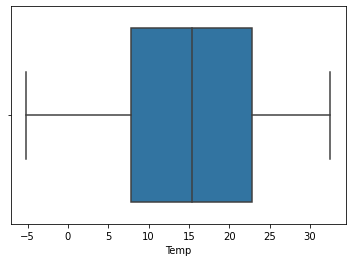

In [11]:
sns.boxplot(x=df["Temp"]);
plt.show()

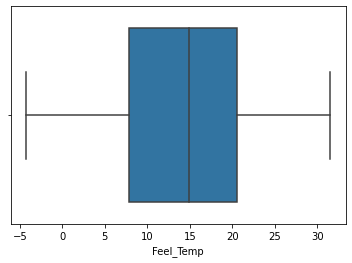

In [12]:
sns.boxplot(x=df["Feel_Temp"]);
plt.show()

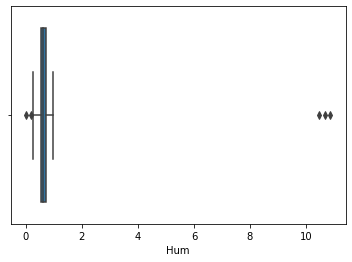

In [13]:
sns.boxplot(x=df["Hum"]);
plt.show()

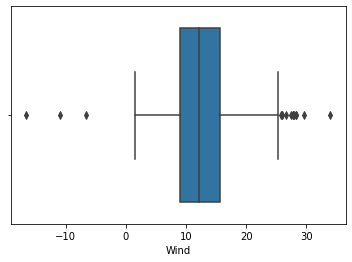

In [14]:
sns.boxplot(x=df["Wind"]);
plt.show()

In [15]:
df.Weather.unique()

array(['Mist + Cloudy', 'Few clouds', ' Partly    cloudy', 'Clear',
       'Mist', 'Mist + Broken clouds', ' Partly cloudy',
       'Mist + Few clouds', 'Rain + Thunderstorm',
       'Light Rain + Scattered clouds', 'Snow'], dtype=object)

In [16]:
#agrupacion de climas
df.Weather = df.Weather.mask(df.Weather.isin(['Mist + Cloudy', 'Mist', 'Mist + Broken clouds','Mist + Few clouds']),"neblina")
df.Weather = df.Weather.mask(df.Weather.isin(['Rain + Thunderstorm','Light Rain + Scattered clouds','Snow']),"precipitacion")
df.Weather = df.Weather.mask(df.Weather.isin(['Few clouds', ' Partly    cloudy', 'Clear',' Partly cloudy']),"otros")

In [17]:
df.Weather.unique()

array(['neblina', 'otros', 'precipitacion'], dtype=object)

# 2. Analisis de datos

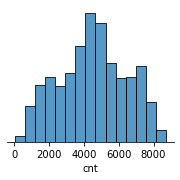

In [18]:
sns.pairplot(df.loc[:, df.columns.isin(['cnt'])], corner=True)

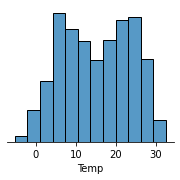

In [19]:
sns.pairplot(df.loc[:, df.columns.isin(['Temp'])], corner=True)

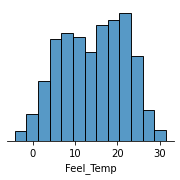

In [20]:
sns.pairplot(df.loc[:, df.columns.isin(['Feel_Temp'])], corner=True)

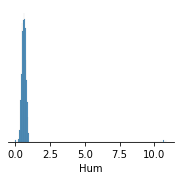

In [21]:
sns.pairplot(df.loc[:, df.columns.isin(['Hum'])], corner=True)

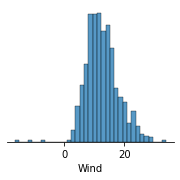

In [22]:
sns.pairplot(df.loc[:, df.columns.isin(['Wind'])], corner=True)

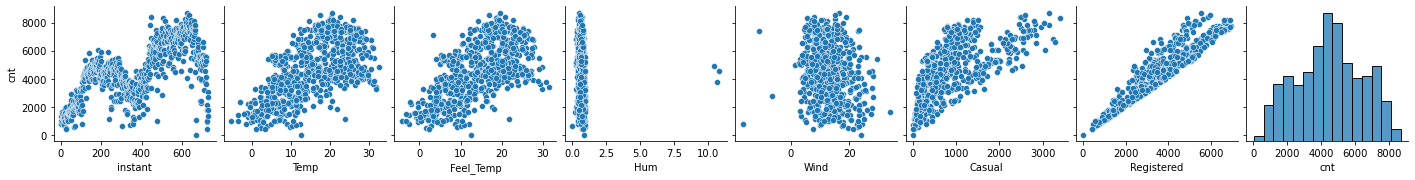

In [23]:
data_num = df.select_dtypes(include = ['float64','int64']);
sns.pairplot(data=data_num,x_vars=data_num.columns,y_vars=['cnt']);

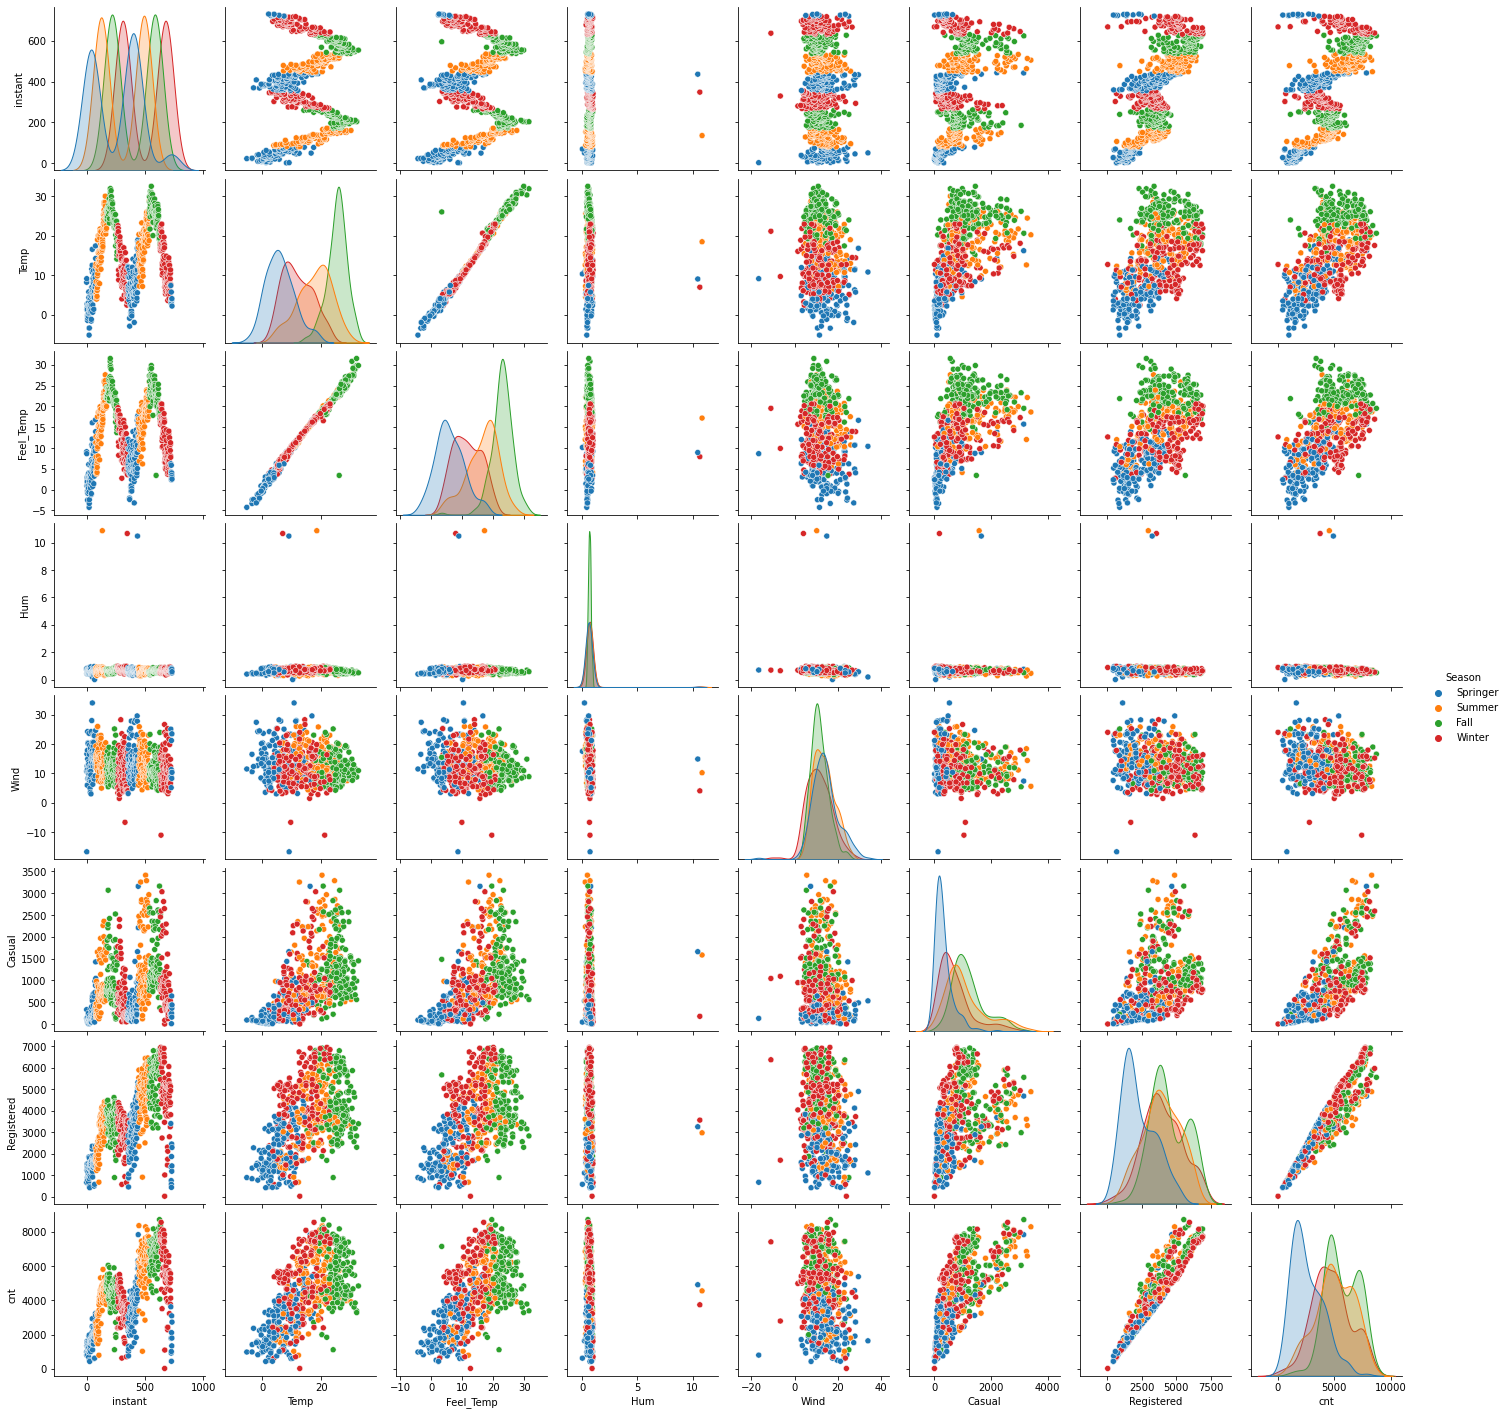

In [24]:
sns.pairplot(df.drop(["Date","Holiday","Weather"],axis = 1),hue = "Season");
plt.show();

# 3. Desarrolo de modelos de Machine Learning

In [25]:
df.drop("Date",axis = 1, inplace = True)
df

,instant,Season,Holiday,Weather,Temp,Feel_Temp,Hum,Wind,Casual,Registered,cnt
0,1,Springer,No,neblina,8.175849,9.090375,0.805833,10.749882,331,654,985
1,2,Springer,No,neblina,9.083466,8.625733,0.696087,-16.652113,131,670,801
2,3,Springer,No,otros,1.229108,0.902035,0.437273,16.636703,120,1229,1349
3,4,Springer,No,otros,1.400000,1.969734,0.590435,10.739832,108,1454,1562
4,5,Springer,No,otros,2.666979,2.775690,0.436957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...
726,727,Springer,No,neblina,3.945849,2.652174,0.652917,23.458911,247,1867,2114
727,728,Springer,No,neblina,3.906651,3.987162,0.590000,10.416557,644,2451,3095
728,729,Springer,No,neblina,3.906651,3.392800,0.752917,8.333661,159,1182,1341
729,730,Springer,No,otros,4.024151,2.889900,0.483333,23.500518,364,1432,1796


In [26]:
#transofrmaciones

df = pd.get_dummies(df)
x = df.drop("cnt",axis=1)
y = df[["cnt"]]

#entrenamiento
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/4, random_state = 5)

df

,instant,Temp,Feel_Temp,Hum,Wind,Casual,Registered,cnt,Season_Fall,Season_Springer,Season_Summer,Season_Winter,Holiday_No,Holiday_Yes,Weather_neblina,Weather_otros,Weather_precipitacion
0,1,8.175849,9.090375,0.805833,10.749882,331,654,985,0,1,0,0,1,0,1,0,0
1,2,9.083466,8.625733,0.696087,-16.652113,131,670,801,0,1,0,0,1,0,1,0,0
2,3,1.229108,0.902035,0.437273,16.636703,120,1229,1349,0,1,0,0,1,0,0,1,0
3,4,1.400000,1.969734,0.590435,10.739832,108,1454,1562,0,1,0,0,1,0,0,1,0
4,5,2.666979,2.775690,0.436957,12.522300,82,1518,1600,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,3.945849,2.652174,0.652917,23.458911,247,1867,2114,0,1,0,0,1,0,1,0,0
727,728,3.906651,3.987162,0.590000,10.416557,644,2451,3095,0,1,0,0,1,0,1,0,0
728,729,3.906651,3.392800,0.752917,8.333661,159,1182,1341,0,1,0,0,1,0,1,0,0
729,730,4.024151,2.889900,0.483333,23.500518,364,1432,1796,0,1,0,0,1,0,0,1,0


In [27]:
#entrenamienton con regresion lineal
reg = LinearRegression()
reg.fit(x_train, y_train)
lr_pred = reg.predict(x_test)
mean_absolute_error(y_test, lr_pred)

1.323639610615958e-12

In [28]:
#entrenamiento con Lasso
las = Lasso()
las.fit(x_train, y_train)
las_pred = las.predict(x_test)

print(mean_absolute_error(y_test, las_pred))

0.0065081008328913845


In [29]:
#entrenamiento con Ridge
rdg = Ridge()
rdg.fit(x_train, y_train)
rdg_pred = rdg.predict(x_test)

print( mean_absolute_error(y_test, rdg_pred))

3.5957113219900257e-06


In [30]:
#entrenamiento con modelo polinomial
pol = PolynomialFeatures(degree = 5, include_bias = False)
pol.fit(x_train)
num = pol.transform(x_train)

lr = LinearRegression()
lr.fit(num, y_train)
X_test= pol.transform(x_test)
lr_pred = lr.predict(X_test)

print(mean_absolute_error(y_test, lr_pred))

18497.839698973516


# 4. Evaluacion de modelos

Podemos observar que el modelo polinomial tiene demasiado error por lo que queda descartado. El siguiente modelo con mas error es Ridge seguido por el modelo lineal y auqnue son mas bajos que el modelo polinomial aun contienen errores por encima de 0 asi que su uso no es recomendable

El model Lasso, sin embargo, presenta un error muy bajo, por lo que al comparar este valor con los demas podemos deducir que este es el mejor modelo para este caso en especifico.

# 5. Interpretacion

In [31]:
coef_dicc = {}
for coef, feat in zip(las.coef_,x_train.columns):
    coef_dicc[feat] = coef
coef_dicc

{'instant': 3.40215620246667e-05,
 'Temp': 0.0,
 'Feel_Temp': 0.0,
 'Hum': -0.0,
 'Wind': -0.0,
 'Casual': 1.0000077012047857,
 'Registered': 0.9999949134829782,
 'Season_Fall': -0.0,
 'Season_Springer': 0.0,
 'Season_Summer': 0.0,
 'Season_Winter': -0.0,
 'Holiday_No': 0.0,
 'Holiday_Yes': -0.0,
 'Weather_neblina': -0.0,
 'Weather_otros': 0.0,
 'Weather_precipitacion': -0.0}

In [32]:
sort_dic = sorted(coef_dicc)
sort_dic

['Casual',
 'Feel_Temp',
 'Holiday_No',
 'Holiday_Yes',
 'Hum',
 'Registered',
 'Season_Fall',
 'Season_Springer',
 'Season_Summer',
 'Season_Winter',
 'Temp',
 'Weather_neblina',
 'Weather_otros',
 'Weather_precipitacion',
 'Wind',
 'instant']

•	¿Cuáles son las 3 variables más importantes para la predicción de la cantidad de usuarios?

Las 3 variables mas importantes son CASUAL, FEEL_TEMP y HUM

•	Describa cual es el escenario ideal para el incremento de usuarios

La mejor temproada es Fall (otoño) en un escenario sin lluvia ni neblina, con vientos y humedad baja, de preferencia festivo

•	¿Qué pasos adicionales deberían tener en cuenta para una próxima iteración/mejora del modelo?

Obtener mas datos, revisar las variables mas deteneidamente con el experto y revisar las cantidades de usuarios